In [1]:
import os, sys

import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree
from PairFunctions import Test
from PairFunctions import Aggregate
import matplotlib.pyplot as plt

#plt.style.use('dark_background')


df = pd.read_csv("data/exToptimizedtrain.csv")
testdf = pd.read_csv("data/exToptimizedtest.csv")

labelnames = ['Adrenal', 'Bladder', 'Brain', 'Breast', 'Cervix', 'Colon', 'Esophagus', 'Head', 'Kidney', 'Leukemia', 'Liver',
'Lung', 'Lymph', 'Ovarian', 'Pancreas', 'Peritoneum', 'Prostate', 'Sarcoma', 'Skin', 'Stomach', 'Testis', 'Thyroid', 'Uterus']

featurenames = list(df.columns)

In [2]:
def PairwiseTree(otraindf, otestdf, target1, target2):
    print("Starting pair ", target1, " and ", target2)

    #Takes a copy so the original is unaffected
    traindf = otraindf.copy()
    testdf = otestdf.copy()


    #eliminates all instances that don't belong to the pair for both training and testing sets
    elimlist = list()
    trainlabels = list(traindf['labels'])
    for i in range(len(trainlabels)):
        if trainlabels[i] != target1 and trainlabels[i] != target2:
            elimlist.append(i)
    traindf.drop(elimlist, inplace=True)
    traindf.reset_index(drop = True, inplace = True)

    elimlist = list()
    testlabels = list(testdf['labels'])
    for i in range(len(testlabels)):
        if testlabels[i] != target1 and testlabels[i] != target2:
            elimlist.append(i)
    testdf.drop(elimlist, inplace=True)
    testdf.reset_index(drop = True, inplace = True)

    feature_cols = list(traindf.columns)
    feature_cols.remove('labels')

    x_train = traindf[feature_cols].to_numpy()
    y_train = traindf['labels'].to_numpy()

    x_test = testdf[feature_cols].to_numpy()
    y_test = testdf['labels'].to_numpy()


    clf = DecisionTreeClassifier()
    clf = clf.fit(x_train,y_train)

    y_pred = clf.predict(x_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)

    #Print out tree
    text_rep = tree.export_text(clf)
    print(text_rep)

    return accuracy

In [3]:
def featureindex(featurename):
    featurelist = list(df.columns)
    for i in range(len(featurelist)):
        if featurelist[i] == featurename:
            return i - 1

In [4]:
def NarrowToTwoLabels(df, label1, label2):
    classlist = list(df['labels'])
    indexlist = list()
    for i in range(len(classlist)):
        if classlist[i] == label1 or classlist[i] == label2:
            indexlist.append(i)
    return indexlist


def graphpairfeature(df, featurename, label1, label2, indexlist):
    classlist = list(df['labels'])
    featurelist = list(df[featurename])
    graphfeaturelist = list()
    graphclasslist = list()
        
    for i in indexlist:
        graphfeaturelist.append(featurelist[i])
        graphclasslist.append(classlist[i])
        
    graphindex = 0
    for i in range(len(graphclasslist)):
        if graphclasslist[i] == label1:
            graphclasslist[i] = graphindex
            graphindex += 1
    graphindex += 50
    for i in range(len(graphclasslist)):
        if graphclasslist[i] == label2:
            graphclasslist[i] = graphindex
            graphindex += 1
    markersizelist = [10] * len(graphclasslist)
    plt.scatter(graphclasslist, graphfeaturelist, s=markersizelist)
    title = str(featurename) + "  feature_" + str(featureindex(featurename))
    plt.title(title)
    plt.ylabel('Feature Value')
    plt.xlabel('Iteration split by label')
    plt.show()

Labels being compared: Adrenal  and  Breast


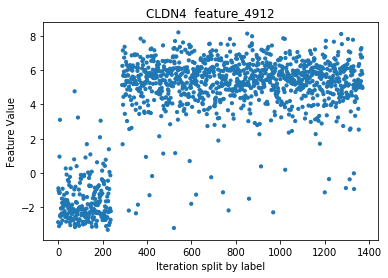

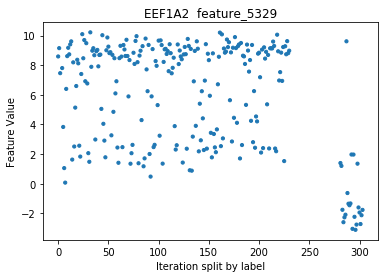

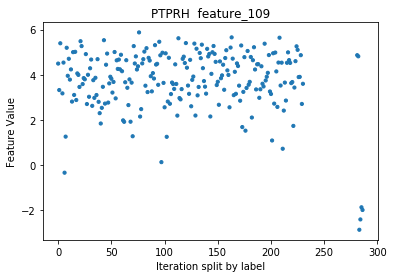

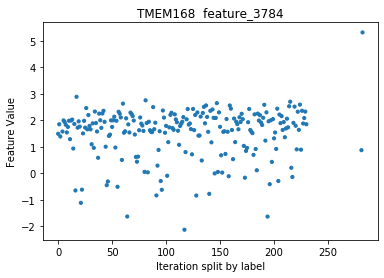

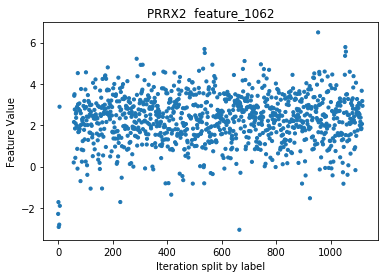

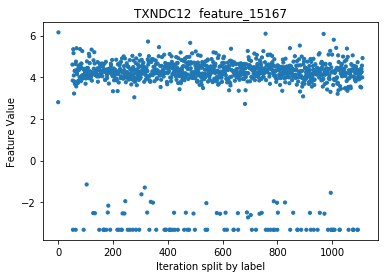

In [5]:
label1 = 0
label2 = 3

featurenum = 4912
featurename = featurenames[featurenum + 1]
print("Labels being compared:", labelnames[label1], " and ", labelnames[label2])

#first feature
indexlist = NarrowToTwoLabels(df, label1, label2)
graphpairfeature(df, featurename, label1, label2, indexlist)

#split
tmpindexlist = list()
tmpindexlist2 = list()
for i in indexlist:
    v = list(df[featurename])[i]

    if v <= 1.11:
        
        tmpindexlist.append(i)
    
    if v > 1.11:

        tmpindexlist2.append(i)
        
indexlist = tmpindexlist

#new value
featurenum = 5329
featurename = featurenames[featurenum + 1]
graphpairfeature(df, featurename, label1, label2, indexlist)

#split
tmpindexlist = list()
for i in indexlist:
    v = list(df[featurename])[i]

    if v > -0.28:
        
        tmpindexlist.append(i)
        
indexlist = tmpindexlist

#new value
featurenum = 109
featurename = featurenames[featurenum + 1]
graphpairfeature(df, featurename, label1, label2, indexlist)

#split
tmpindexlist = list()
for i in indexlist:
    v = list(df[featurename])[i]

    if v > -1.09:
        
        tmpindexlist.append(i)
        
indexlist = tmpindexlist

#new value
featurenum = 3784
featurename = featurenames[featurenum + 1]
graphpairfeature(df, featurename, label1, label2, indexlist)


indexlist = tmpindexlist2

#new value
featurenum = 1062
featurename = featurenames[featurenum + 1]
graphpairfeature(df, featurename, label1, label2, indexlist)

#split
tmpindexlist = list()
for i in indexlist:
    v = list(df[featurename])[i]

    if v > -1.72:
        
        tmpindexlist.append(i)
        
indexlist = tmpindexlist

#new value
featurenum = 15167
featurename = featurenames[featurenum + 1]
graphpairfeature(df, featurename, label1, label2, indexlist)

Labels being compared: Brain  and  Skin


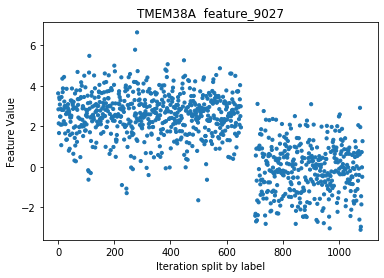

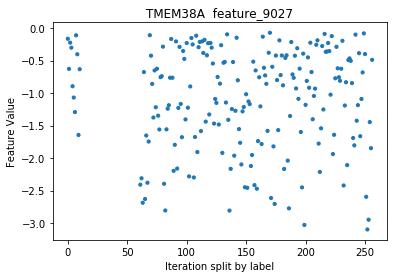

In [6]:
label1 = 2
label2 = 18

featurenum = 9027
featurename = featurenames[featurenum + 1]
print("Labels being compared:", labelnames[label1], " and ", labelnames[label2])

#first feature
indexlist = NarrowToTwoLabels(df, label1, label2)
graphpairfeature(df, featurename, label1, label2, indexlist)

#split
tmpindexlist = list()
for i in indexlist:
    v = list(df[featurename])[i]

    if v <= -0.07:
        
        tmpindexlist.append(i)
        
indexlist = tmpindexlist

#new value
featurenum = 9027
featurename = featurenames[featurenum + 1]
graphpairfeature(df, featurename, label1, label2, indexlist)